## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# loading the data

data = pd.read_csv("Salary Data.csv")

In [4]:
# calling the dataframe to do all the basic checks

data.head(8) #data.head(8) calls first 8 rows of the data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0


In [5]:
data.describe()  #The describe() method returns description of the data in the DataFrame.

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [6]:
data.info() #data.info() method pulls the basic info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [7]:
# renaming the columns
data.rename(columns={'Education Level': 'Edulevel','Job Title': 'Jobtitle','Years of Experience':'Yoe'}, inplace=True)
data.head()

,Age,Gender,Edulevel,Jobtitle,Yoe,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## Exploratory Data Analysis

<AxesSubplot: xlabel='Gender', ylabel='Count'>

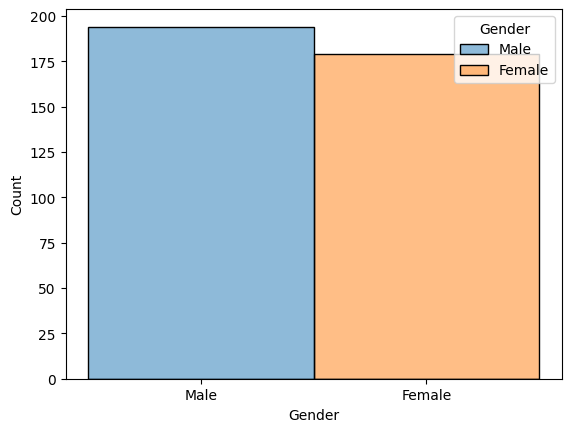

In [8]:
# Univariate Analysis
sns.histplot(x=data.Gender,hue=data.Gender)

<AxesSubplot: xlabel='Edulevel', ylabel='Count'>

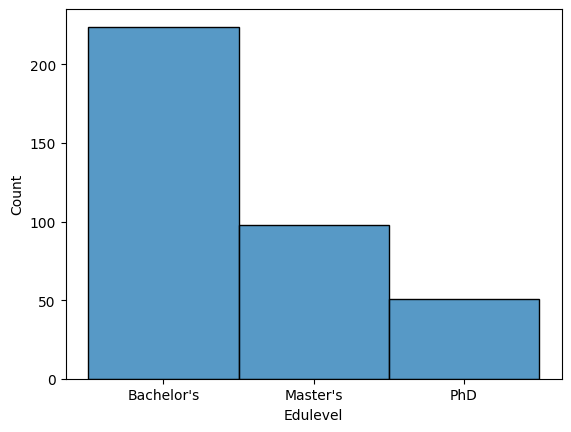

In [9]:
sns.histplot(x=data.Edulevel)

<AxesSubplot: xlabel='Age', ylabel='Count'>

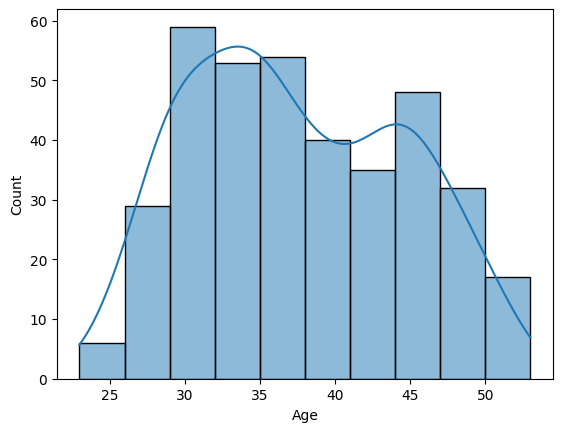

In [10]:
sns.histplot(x=data.Age,kde=True)

<AxesSubplot: xlabel='Age', ylabel='Salary'>

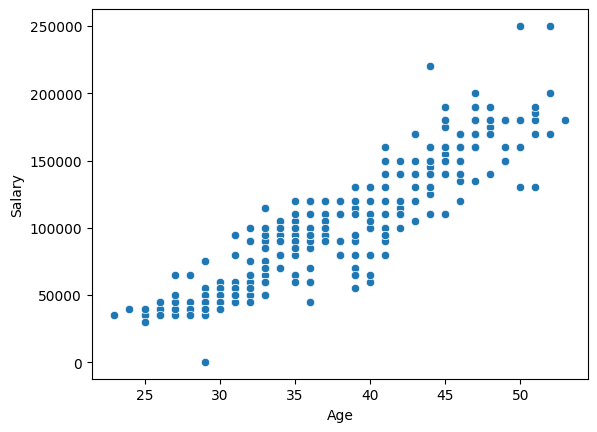

In [11]:
# Bivariate analysis
sns.scatterplot(x=data.Age,y=data.Salary)

<AxesSubplot: xlabel='Edulevel', ylabel='Salary'>

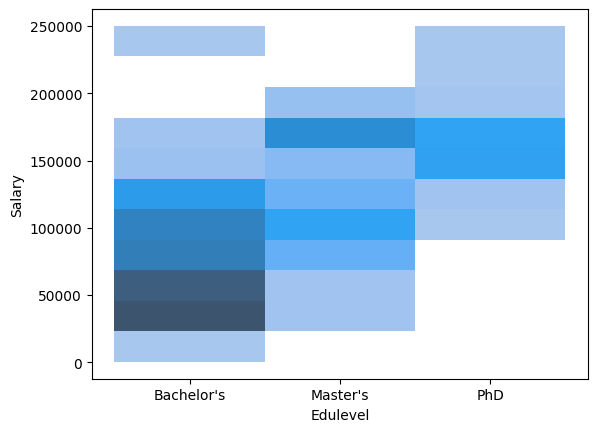

In [12]:
sns.histplot(x=data.Edulevel,y=data.Salary)

<AxesSubplot: xlabel='Gender', ylabel='Salary'>

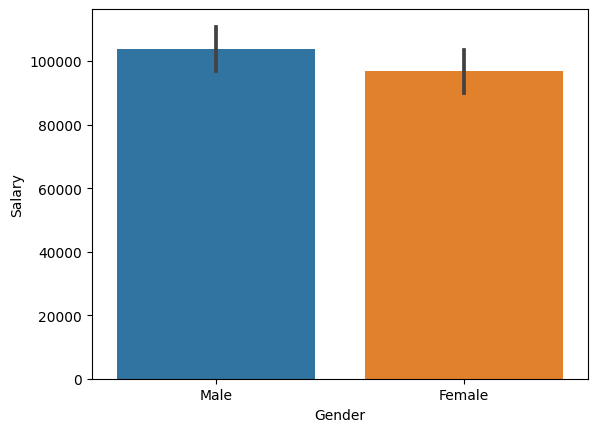

In [13]:
sns.barplot(x=data.Gender,y=data.Salary)

<AxesSubplot: xlabel='Age'>

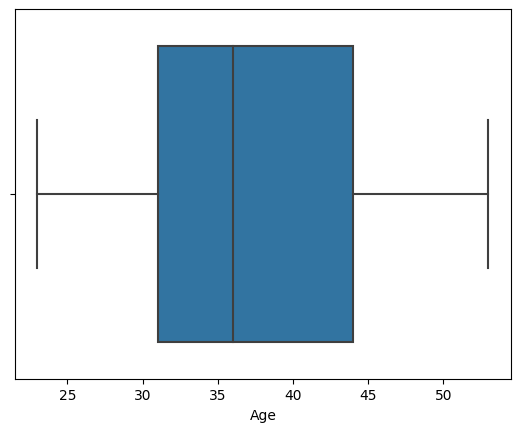

In [14]:
sns.boxplot(x=data.Age,data=data)

<AxesSubplot: xlabel='Yoe'>

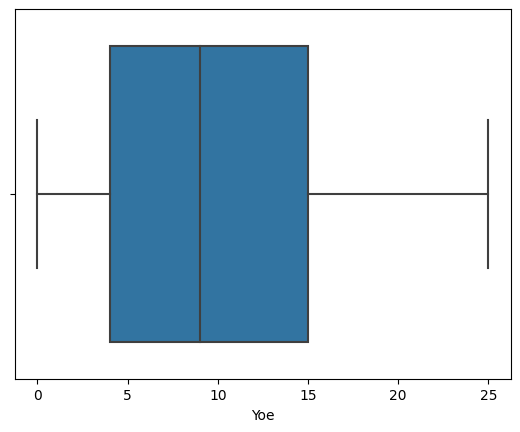

In [15]:
sns.boxplot(x=data.Yoe,data=data)

<AxesSubplot: xlabel='Salary'>

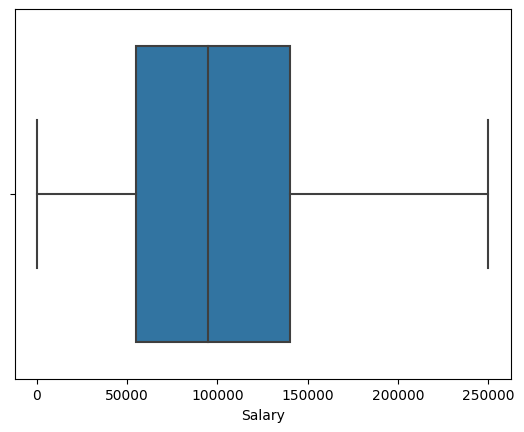

In [16]:
sns.boxplot(x=data.Salary,data=data)

## Data preprocessing and Feature Engineering

In [17]:
# finding missing values
data.isnull().sum()

Age         2
Gender      2
Edulevel    2
Jobtitle    2
Yoe         2
Salary      2
dtype: int64

In [18]:
data.dropna(axis=0,inplace=True)

In [19]:
data.isnull().sum()

Age         0
Gender      0
Edulevel    0
Jobtitle    0
Yoe         0
Salary      0
dtype: int64

In [20]:
data.head()

,Age,Gender,Edulevel,Jobtitle,Yoe,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [21]:
data['Gender'].replace(['Male','Female'],[1,0],inplace = True)

In [22]:
data['Edulevel'].replace(["Bachelor's","Master's","PhD"],[1,2,3],inplace = True)

In [23]:
print(data.Jobtitle.value_counts().to_string())

Director of Marketing                    12
Director of Operations                   11
Senior Business Analyst                  10
Senior Marketing Analyst                  9
Senior Marketing Manager                  9
Junior Business Analyst                   8
Senior Financial Analyst                  7
Junior Financial Analyst                  7
Junior Business Development Associate     7
Senior Project Manager                    7
Senior Data Scientist                     7
Senior Software Engineer                  6
Junior Marketing Coordinator              6
Senior Product Manager                    6
Senior Financial Manager                  5
Junior Operations Analyst                 5
Junior Project Manager                    5
Junior Marketing Specialist               5
Senior Product Designer                   5
Senior Operations Manager                 5
Senior Project Coordinator                5
Senior Data Engineer                      4
Senior Marketing Specialist     

In [24]:
data.drop(['Jobtitle'],axis=1,inplace=True)

In [25]:
# from sklearn.preprocessing import MinMaxScaler
# scale=MinMaxScaler()
# data[['Age','Gender','Edulevel','Yoe']]=scale.fit_transform(data[['Age','Gender','Edulevel','Yoe']])

In [26]:
data.head()

,Age,Gender,Edulevel,Yoe,Salary
0,32.0,1,1,5.0,90000.0
1,28.0,0,2,3.0,65000.0
2,45.0,1,3,15.0,150000.0
3,36.0,0,1,7.0,60000.0
4,52.0,1,2,20.0,200000.0


## Model Creation

In [27]:
# Independent and dependent variable creation
X=data[['Age','Gender','Edulevel','Yoe']] ## X variable contains all inputs
y=data.Salary ## y is output

In [28]:
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: Salary, Length: 373, dtype: float64

In [29]:
# Traning and testing data creation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

In [30]:
y_train

182    145000.0
54      50000.0
216     95000.0
291    180000.0
105    220000.0
         ...   
337     90000.0
367    150000.0
106     50000.0
228    120000.0
202    130000.0
Name: Salary, Length: 298, dtype: float64

In [31]:
# Creating model
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression
y_predict=LR.predict(X_test)

In [32]:
y_test #Actual values

224     40000.0
192     45000.0
226    160000.0
284    100000.0
112    130000.0
         ...   
215    100000.0
98      90000.0
27      40000.0
19     180000.0
240    160000.0
Name: Salary, Length: 75, dtype: float64

In [33]:
y_predict # Values predicted by model

array([ 47098.0539397 ,  47795.06748479, 172633.30584438,  86620.05562488,
       158389.83839277, 171971.68254017,  90637.8355039 ,  44474.30115085,
        79345.83502242,  50418.82027364, 121854.69391861,  42149.06724405,
        59385.58684832,  67022.91187293,  80640.14626121, 120859.16149147,
       129790.53782527, 186947.55377775,  47098.0539397 ,  81969.58781127,
        49256.20332024,  62407.83430021, 173635.29314276,  98609.06965144,
       156392.31866725,  47098.0539397 ,  96248.44550376, 160679.6820587 ,
        49786.39226867,  68352.353423  ,  42149.06724405, 147425.55209258,
       186285.93047354, 183925.30632586, 150746.31842651, 152046.82460694,
        67022.91187293, 148392.14915008, 182929.51396912,  70677.5873298 ,
        78648.82147734, 192593.55401849,  48623.77531526,  76025.06868848,
       154401.25381298,  50120.30139159, 146430.01966544,  52744.05418044,
        81969.58781127, 172633.30584438,  87615.58805201,  61710.82075512,
        68352.353423  , 1

In [34]:
#Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
r2score=r2_score(y_test,y_predict)
r2score

0.9039262141270619

In [35]:
mr=mean_absolute_error(y_test,y_predict)
mr

11122.596489845855

In [36]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
tr_test=[[29,3,1,5]]
tr_predict=LR.predict(tr_test)
tr_predict

array([73934.02805323])

In [38]:
tr_test=[[22,1,1,0]]
tr_predict=LR.predict(tr_test)
tr_predict

array([22522.98812248])

In [39]:
import pickle
file = open("ml-linear-salary-prediction.pkl","wb")
pickle.dump(LR, file)